# Q&A Activity Question Week -10
### Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings(action="ignore")

## 1.Load the data into the pandas environment and identify some basic details of the dataset.

In [3]:
# importing data set in to python envirinment 
df= pd.read_csv("employee.csv")

In [4]:
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [5]:
#shape of the dataset
df.shape

(9, 7)

In [6]:
#columns present in the dataset
df.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [7]:
#A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [8]:
df.isnull()

,name,age,income,gender,department,grade,performance_score
0,False,False,True,True,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,True,False,True,False,False,False
6,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False


In [9]:
# Checking null values
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [10]:
# Checking null values
df.isna().sum().sum()

6

<AxesSubplot:>

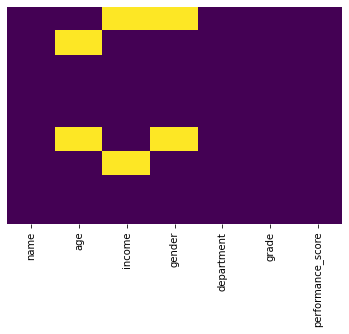

In [11]:
sns.heatmap(df.isnull(),yticklabels= False,cbar=False,cmap="viridis")

In [12]:
df.nunique()

name                 9
age                  5
income               7
gender               2
department           3
grade                4
performance_score    9
dtype: int64

In [13]:
# Getting descriptive statistics summary of dataset
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


<AxesSubplot:>

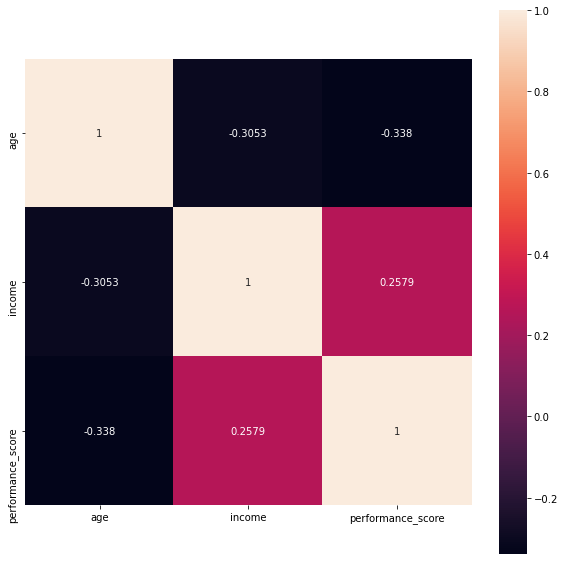

In [14]:
corr= df.corr()
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmax=1, square=True,annot=True,fmt=".4g",ax=ax)

## 2.Reset the index as "name" as the index

In [15]:
df.set_index(["name"],inplace=True)

In [16]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 3. Select rows for specific names Jack Morgan and Josh wills.

In [17]:
df.loc[["Jack Morgan","Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## 4. Select data for multiple values "Sales" and “Finance”

In [18]:
df[(df["department"]=="Sales") | (df["department"]=="Finance")]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5.Display employee who has more than 700 performance score.

In [19]:
df[df["performance_score"]>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 6. Display employee who has more than 500 and less than 700 performance score 

In [20]:
df[(df["performance_score"]>500) & (df["performance_score"]<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7.Check and handle missing values in the dataset. 

In [21]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [22]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [23]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

<AxesSubplot:xlabel='age', ylabel='Density'>

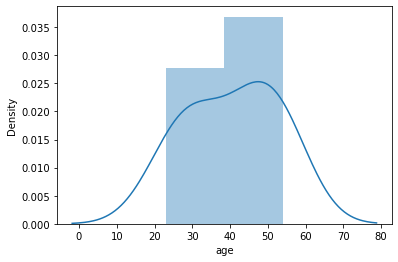

In [24]:
sns.distplot(df["age"])

<AxesSubplot:xlabel='income', ylabel='Density'>

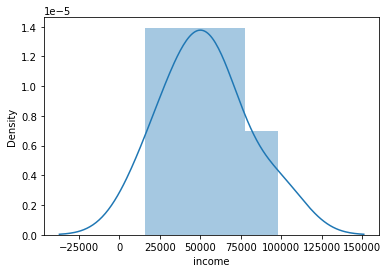

In [25]:
sns.distplot(df["income"])

In [26]:
#filling missing values of age with its median
df["age"]=df["age"].fillna(df["age"].median())
#filling missing values of income with its median
df["income"]=df["income"].fillna(df["income"].median())
#filling missing values of gender with  commonly occuring value
df["gender"]=df["gender"].fillna(df["gender"].value_counts().index[0])

In [27]:
df.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

## 8.Check the outliers and handle outliers in performance score using Percentiles 

Text(0.5, 1.0, 'Box plot of Performance score')

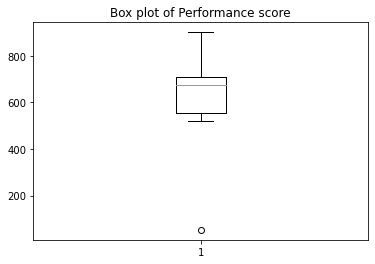

In [28]:
plt.boxplot(df["performance_score"])
plt.title("Box plot of Performance score")

In [29]:
#finding different quartile values of income 
Q1= np.percentile(df["performance_score"],25,interpolation="midpoint")
Q2= np.percentile(df["performance_score"],50,interpolation="midpoint")
Q3= np.percentile(df["performance_score"],75,interpolation="midpoint")

In [30]:
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [31]:
#finding IQR
IQR= Q3-Q1
IQR

155.0

In [32]:
#finding lower limit & upper limit
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

323.5
943.5


In [33]:
#removing all the value below lower limit & above upper limt
outlier=[]
for x in df["performance_score"]:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)

In [34]:
#finding outliers
outlier

[53]

In [35]:
#finding index of this outliers & droping
index=df["performance_score"][(df["performance_score"]<low_lim) |(df["performance_score"]>up_lim)]


In [36]:
index

name
James Authur    53
Name: performance_score, dtype: int64

In [37]:
df.drop(['James Authur'],inplace= True)

Text(0.5, 1.0, 'Box plot of Performance score')

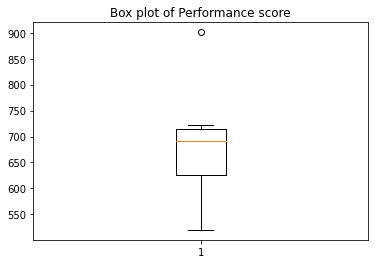

In [38]:
plt.boxplot(df["performance_score"])
plt.title("Box plot of Performance score")

## 9. Check the gender column and do Dummy encoding. 

In [39]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [40]:
df=pd.get_dummies(df,columns=["gender"])

In [41]:
df

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


## 10. Do the standard scaling on the feature performance score

In [42]:
df.columns

Index(['age', 'income', 'department', 'grade', 'performance_score', 'gender_F',
       'gender_M'],
      dtype='object')

In [43]:
from sklearn import preprocessing
std=preprocessing.StandardScaler()
x=df["performance_score"]
x=x.values.reshape(-1,1)
x=std.fit_transform(x)
x

array([[ 0.39226224],
       [-1.47587231],
       [-0.05866679],
       [-1.14457751],
       [ 0.28183064],
       [-0.28873262],
       [ 2.03033096],
       [ 0.26342538]])